All public transport, excluding LUAS_Predictions predictions for 2024:
Week 1: 2680028
Week 2: 2684083
Week 3: 2688138
Week 4: 2692193
Week 5: 2696249
Week 6: 2700304
Week 7: 2704359
Week 8: 2708414
Week 9: 2712470
Week 10: 2716525
Week 11: 2720580
Week 12: 2724635
Week 13: 2728691
Week 14: 2732746
Week 15: 2736801
Week 16: 2740857
Week 17: 2744912
Week 18: 2748967
Week 19: 2753022
Week 20: 2757078
Week 21: 2761133
Week 22: 2765188
Week 23: 2769243
Week 24: 2773299
Week 25: 2777354
Week 26: 2781409
Week 27: 2785464
Week 28: 2789520
Week 29: 2793575
Week 30: 2797630
Week 31: 2801686
Week 32: 2805741
Week 33: 2809796
Week 34: 2813851
Week 35: 2817907
Week 36: 2821962
Week 37: 2826017
Week 38: 2830072
Week 39: 2834128
Week 40: 2838183
Week 41: 2842238
Week 42: 2846294
Week 43: 2850349
Week 44: 2854404
Week 45: 2858459
Week 46: 2862515
Week 47: 2866570
Week 48: 2870625
Week 49: 2874680
Week 50: 2878736
Week 51: 2882791
Week 52: 2886846


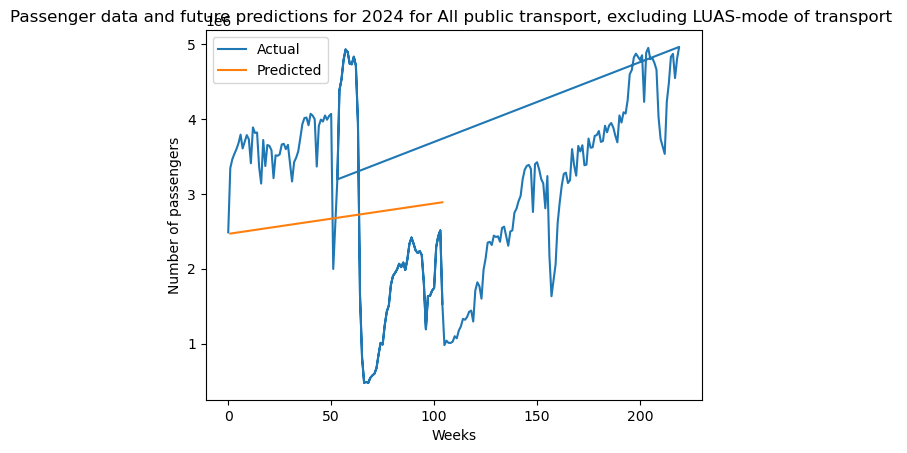

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a Pandas DataFrame
data = pd.read_csv('All public transport_excluding LUAS.csv')

# Pivot the DataFrame to have modes of transport as columns and weeks of the year as rows
data = data.pivot( columns='Mode of Transport', values='VALUE')

# Update the index to include the weeks of 2024
data = data.reindex(list(data.index) + list(range(53, 105)), fill_value=None)

# Create separate DataFrames for each mode of transport
All_data = data[['All public transport, excluding LUAS']]


# Drop rows with missing values
data.dropna(inplace=True)
# Drop rows with missing values
All_data.dropna(inplace=True)

# Create a linear regression model for each mode of transport
All_model = LinearRegression()

# Fit the models using the data
All_model.fit(All_data.index.values.reshape(-1, 1), All_data.values.reshape(-1, 1))

# Predict the number of passengers for the next 52 weeks, which includes weeks of 2024
All_predictions = All_model.predict([[i] for i in range(1, 53+52)])

# Print the predictions for weeks of 2024
print("All public transport, excluding LUAS_Predictions predictions for 2024:")
for i in range(52, len(All_predictions)):
    print(f"Week {i-51}: {int(round(All_predictions[i][0]))}")
    
    
        
import matplotlib.pyplot as plt

# Plot the actual rail passenger data
plt.plot(data.index, data['All public transport, excluding LUAS'], label='Actual')

# Plot the predicted rail passenger data for 2024
plt.plot(range(1, 53+52), All_predictions, label='Predicted')

# Add labels and legend
plt.xlabel('Weeks')
plt.ylabel('Number of passengers')
plt.title('Passenger data and future predictions for 2024 for All public transport, excluding LUAS-mode of transport ')
plt.legend()

# Show the plot
plt.show()

